<a href="https://colab.research.google.com/github/bsenst/UWWi_DataDive_Dec22/blob/main/external_datasets/news/food_news_CPI_call_volumne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# loading the feedparser googlenews script

In [2]:
! wget "https://github.com/datakind/UWWi_DataDive_Dec22/raw/main/external_datasets/googlenews/googlenews.py"

--2022-12-03 09:37:16--  https://github.com/datakind/UWWi_DataDive_Dec22/raw/main/external_datasets/googlenews/googlenews.py
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/datakind/UWWi_DataDive_Dec22/main/external_datasets/googlenews/googlenews.py [following]
--2022-12-03 09:37:16--  https://raw.githubusercontent.com/datakind/UWWi_DataDive_Dec22/main/external_datasets/googlenews/googlenews.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2600 (2.5K) [text/plain]
Saving to: ‘googlenews.py’

googlenews.py       100%[===================>]   2.54K  --.-KB/s    in 0s      

2022-12-03 09:37:17 (4

In [7]:
! pip install feedparser
import feedparser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
! python3 googlenews.py --search food

The Best of 2022: Wisconsin Food & Drink - UpNorthNews
Fri, 02 Dec 2022 00:15:11 GMT
Inflation drives more Wisconsin college students to food pantries - Milwaukee Journal Sentinel
Thu, 01 Dec 2022 12:02:11 GMT
Wisconsin food and other home-grown presents can be nice holiday surprises. Go ask Alice (in Dairyland). - WIZM NEWS
Thu, 01 Dec 2022 00:37:55 GMT
Milwaukee and Wisconsin food, drink events: Sprecher, Kohler, Pfister - Milwaukee Journal Sentinel
Mon, 28 Nov 2022 14:11:15 GMT
Explore Wisconsin's rich 'Food Traditions' - PBS Wisconsin
Fri, 18 Nov 2022 08:00:00 GMT
Food Party Planning with Wisconsin Cheese - KOKH FOX25
Thu, 01 Dec 2022 17:06:49 GMT
Food Insecurity Resources in the Coulee Region | Wisconsin Public Radio - Wisconsin Public Radio
Fri, 02 Dec 2022 18:03:36 GMT
Wisconsin Food Stamps Schedule December 2022 - GOBankingRates
Wed, 30 Nov 2022 12:36:32 GMT
Milwaukee and Wisconsin food and drink events - Milwaukee Journal Sentinel
Mon, 21 Nov 2022 08:00:00 GMT
Honoring our foo

# load UWWI datasets

In [148]:
uwwi22 = pd.read_csv("https://github.com/datakind/UWWi_DataDive_Dec22/raw/main/uwwi_datasets/uwwi_dataset_interactions/uwwi_dataset_interactions_2022.csv")
uwwi22["Interaction_CreateStamp"] = pd.to_datetime(uwwi22.Interaction_CreateStamp, utc=True)
uwwi22["Interaction_EditStamp"] = pd.to_datetime(uwwi22.Interaction_EditStamp, utc=True)
uwwi22.shape

(7399, 40)

In [159]:
uwwi21 = pd.read_csv("https://github.com/datakind/UWWi_DataDive_Dec22/raw/main/uwwi_datasets/uwwi_dataset_interactions/uwwi_dataset_interactions_2021.csv")
uwwi21["Interaction_CreateStamp"] = pd.to_datetime(uwwi21.Interaction_CreateStamp, utc=True)
uwwi21["Interaction_EditStamp"] = pd.to_datetime(uwwi21.Interaction_EditStamp, utc=True)
uwwi21.shape

(10986, 40)

In [158]:
uwwi20 = pd.read_csv("https://github.com/datakind/UWWi_DataDive_Dec22/raw/main/uwwi_datasets/uwwi_dataset_interactions/uwwi_dataset_interactions_2020.csv")
uwwi20["Interaction_CreateStamp"] = pd.to_datetime(uwwi20.Interaction_CreateStamp, utc=True)
uwwi20["Interaction_EditStamp"] = pd.to_datetime(uwwi20.Interaction_EditStamp, utc=True)
uwwi20.shape

(14357, 40)

In [162]:
uwwi = pd.concat([uwwi22, uwwi21, uwwi20])
uwwi.shape

(32742, 40)

In [163]:
uwwi.Interaction_CreateStamp

0       2022-12-01 18:53:00.606552+00:00
1       2022-12-01 15:59:04.836496+00:00
2       2022-12-01 15:57:35.767512+00:00
3       2022-12-01 15:56:07.122672+00:00
4       2022-12-01 14:58:26.516401+00:00
                      ...               
14352   2020-01-01 12:38:38.475211+00:00
14353   2020-01-01 12:30:18.547993+00:00
14354   2020-01-01 08:30:40.471245+00:00
14355   2020-01-01 08:19:38.411104+00:00
14356   2020-01-01 07:29:12.852180+00:00
Name: Interaction_CreateStamp, Length: 32742, dtype: datetime64[ns, UTC]

# comparing feedparser results

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
food = pd.read_json("gnewsbyfood.json")

In [11]:
food.head()

,title,title_detail,links,link,published,source
0,4 Wisconsin-Made Foods for the Adventurous - U...,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://news.google.com/__i/rss/rd/articles/CB...,"Mon, 17 Oct 2022 07:00:00 GMT","{'href': 'https://upnorthnewswi.com', 'title':..."
1,"From citrus to herbs, Wisconsin writer is devo...","{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://news.google.com/__i/rss/rd/articles/CB...,"Mon, 26 Sep 2022 07:00:00 GMT","{'href': 'https://captimes.com', 'title': 'The..."
2,Food cart comeback - Isthmus,"{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://news.google.com/__i/rss/rd/articles/CB...,"Thu, 17 Mar 2022 07:00:00 GMT","{'href': 'https://isthmus.com', 'title': 'Isth..."
3,"Where To Find Food, Housing Help And More In W...","{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://news.google.com/__i/rss/rd/articles/CB...,"Thu, 19 Mar 2020 07:00:00 GMT","{'href': 'https://www.wpr.org', 'title': 'Wisc..."
4,"Once stagecoach stops, these restaurants and i...","{'type': 'text/plain', 'language': None, 'base...","[{'rel': 'alternate', 'type': 'text/html', 'hr...",https://news.google.com/__i/rss/rd/articles/CB...,"Fri, 01 Mar 2019 08:00:00 GMT","{'href': 'https://www.jsonline.com', 'title': ..."


In [15]:
len(food)

5

In [60]:
food2 = pd.read_json("https://github.com/datakind/UWWi_DataDive_Dec22/raw/main/external_datasets/googlenews/gnewsbyfood.json", convert_dates=True)
food2.shape

(12, 6)

In [17]:
food2.title

0     Inflation hits Wisconsin food pantries and the...
1     Brittney Griner in Russian custody, Quick meal...
2           Harvest stays closed for upgrades - Isthmus
3     Notable Food and Beverage Executives: Julio He...
4     Wisconsin's oldest-running diner will be featu...
5     Wisconsin Fast-Food Chain Offers Giannis Antet...
6     Milwaukee's 3rd Street Market Hall signs Dairy...
7     Republican plan to end the mask requirement co...
8     Wisconsin farmer says growing food is getting ...
9     Roundy's Wisconsin site ships 162 million poun...
10    Five spots for late-night eats you need to try...
11    New Filipino-Korean-American cafe is a tribute...
Name: title, dtype: object

In [18]:
food.title

0    4 Wisconsin-Made Foods for the Adventurous - U...
1    From citrus to herbs, Wisconsin writer is devo...
2                         Food cart comeback - Isthmus
3    Where To Find Food, Housing Help And More In W...
4    Once stagecoach stops, these restaurants and i...
Name: title, dtype: object

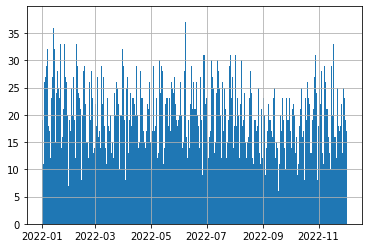

In [69]:
uwwi22.Interaction_CreateStamp.hist(bins=365)

In [82]:
pd.to_datetime(food2.published)

0    2022-04-26 07:00:00+00:00
1    2022-03-25 07:00:00+00:00
2    2022-02-07 08:00:00+00:00
3    2021-12-13 08:00:00+00:00
4    2021-08-10 07:00:00+00:00
5    2021-07-27 07:00:00+00:00
6    2021-05-12 07:00:00+00:00
7    2021-01-27 08:00:00+00:00
8    2020-08-13 07:00:00+00:00
9    2020-04-04 07:00:00+00:00
10   2020-01-14 08:00:00+00:00
11   2019-07-22 07:00:00+00:00
Name: published, dtype: datetime64[ns, UTC]

## food calls and feedparser food articles

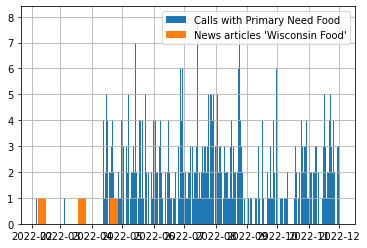

In [83]:
uwwi22.Interaction_CreateStamp[uwwi22.InteractionOption_SwfPrimaryNeeds=="['Food']"].hist(bins=365)
pd.to_datetime(food2.published).loc[:2].hist()
plt.legend(labels=["Calls with Primary Need Food", "News articles 'Wisconsin Food'"])

# comparing to GoogleNews python library

In [19]:
! pip install GoogleNews
from GoogleNews import GoogleNews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 292 kB 4.9 MB/s 


In [21]:
googlenews = GoogleNews(start='01/01/2017',end='11/30/2022')
googlenews.get_news('Wisconsin Food')
results = googlenews.results(sort=True)
len(results)

'<' not supported between instances of 'datetime.datetime' and 'float'


87

In [24]:
food3 = pd.DataFrame(results)
food3.title

0              The Best of 2022: Wisconsin Food & Drink
1          Wisconsin Food Stamps Schedule December 2022
2     Feeding America Wisconsin provides food for th...
3     Wisconsin food and other home-grown presents c...
4     Inflation drives more Wisconsin college studen...
                            ...                        
82    Inflation hits Wisconsin food pantries and the...
83    Wisconsin State Fair food, traditions bring cr...
84    Sheboygan woman remembers family's role in fou...
85    Food deserts in Wisconsin result in short term...
86        Food deserts and food insecurity in Wisconsin
Name: title, Length: 87, dtype: object

In [25]:
food3.to_csv("Wisconsin Food.csv")

In [46]:
food3 = pd.read_csv("Wisconsin Food.csv")

In [47]:
dates = []

month = dict()
month["Jan"] = "1"
month["Feb"] = "2"
month["Mar"] = "3"
month["Apr"] = "4"
month["May"] = "5"
month["Jun"] = "6"
month["Jul"] = "7"
month["Aug"] = "8"
month["Sep"] = "9"
month["Oct"] = "10"
month["Nov"] = "11"
month["Dec"] = "12"

for date in list(food3.date):
  try:
    date = date.split()
    # if len(date) == 3 and date[-1][:2] == "20":
    if len(date) == 3 and date[-1][:2] == "2022":
      date[0] = month[date[0]]
      # print(date)
      dates.append(("-".join(date)).replace(",", ""))
    elif len(date) == 2 and str(date[0]).isalpha:
      date[0] = month[date[0]]
      # print(date)
      dates.append("-".join(date)+"-2022")
    else:
      dates.append(np.nan)
      # print(date)
  except:
    dates.append(np.nan)

food3["date_parsed"] = dates
food3 = food3.drop(['Unnamed: 0', 'desc', 'date', 'datetime', 'img',
       'media', 'site'], axis=1)
food3.head()

,title,link,date_parsed
0,The Best of 2022: Wisconsin Food & Drink,news.google.com/./articles/CBMiS2h0dHBzOi8vdXB...,NaN
1,Wisconsin Food Stamps Schedule December 2022,news.google.com/./articles/CBMie2h0dHBzOi8vd3d...,NaN
2,Feeding America Wisconsin provides food for th...,news.google.com/./articles/CBMiYmh0dHBzOi8vd3d...,11-25-2022
3,Wisconsin food and other home-grown presents c...,news.google.com/./articles/CBMiiQFodHRwczovL3d...,NaN
4,Inflation drives more Wisconsin college studen...,news.google.com/./articles/CBMilwFodHRwczovL3d...,NaN


In [49]:
food3.date_parsed.isna().sum()

43

In [84]:
pd.to_datetime(food3.date_parsed, format="%m-%d-%Y", errors="coerce")

0           NaT
1           NaT
2    2022-11-25
3           NaT
4           NaT
        ...    
82   2022-04-26
83   2022-08-04
84          NaT
85   2022-10-13
86   2022-09-23
Name: date_parsed, Length: 87, dtype: datetime64[ns]

## food calls and gnews food articles

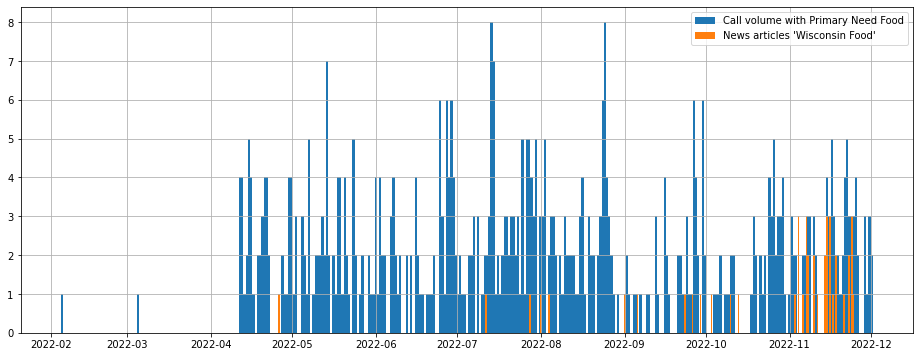

In [103]:
plt.figure(figsize=(16,6))
uwwi22.Interaction_CreateStamp[uwwi22.InteractionOption_SwfPrimaryNeeds=="['Food']"].hist(bins=365)
pd.to_datetime(food3.date_parsed, format="%m-%d-%Y", errors="coerce").hist(bins=365)
plt.legend(labels=["Call volume with Primary Need Food", "News articles 'Wisconsin Food'"])

In [102]:
food3_dates = pd.to_datetime(food3.date_parsed, format="%m-%d-%Y", errors="coerce")
food3["date_parsed"] = food3_dates
food3[["title", "date_parsed"]].sort_values(by="date_parsed", ascending=False).loc[:20]

,title,date_parsed
2,Feeding America Wisconsin provides food for th...,2022-11-25
10,"Thanksgiving food prices are up, but Wisconsin...",2022-11-24
11,Honoring our food – and those who grow it – th...,2022-11-24
28,Festival Foods hosts fifteenth annual Turkey T...,2022-11-24
17,Farmers turn to edible food waste as productio...,2022-11-23
24,Newspaper readers make drive to fill shelves a...,2022-11-23
6,Milwaukee and Wisconsin food and drink events,2022-11-21
52,"Food Friday: Making pasta, sauces for each season",2022-11-18
5,Explore Wisconsin's rich 'Food Traditions',2022-11-18
13,FOX 11 Food Project: Northeast Wisconsin Gives...,2022-11-17


# comparing calls to CPI in 2022

In [110]:
# https://data.bls.gov/pdq/SurveyOutputServlet
cpi = pd.read_csv("/content/cpi.csv")
cpi

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
0,2017,0.4,0.2,0.0,0.1,-0.1,0.1,0.0,0.4,0.5,0.1,0.3,0.2,,
1,2018,0.4,0.3,0.1,0.2,0.3,0.1,0.1,0.2,0.2,0.2,-0.1,0.0,,
2,2019,0.0,0.3,0.4,0.4,0.1,0.0,0.2,0.1,0.2,0.3,0.2,0.2,,
3,2020,0.2,0.1,-0.3,-0.8,-0.1,0.5,0.5,0.4,0.2,0.1,0.1,0.3,,
4,2021,0.2,0.4,0.6,0.6,0.7,0.9,0.5,0.3,0.4,0.9,0.7,0.6,,
5,2022,0.6,0.8,1.2,0.3,1.0,1.3,0.0,0.1,0.4,0.4,,,,NaN


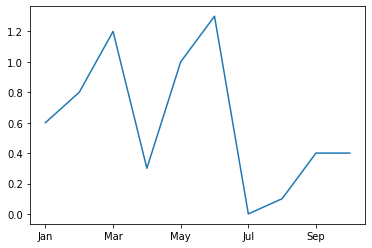

In [122]:
cpi.iloc[5,1:-4].astype(np.float64).plot()

In [132]:
import datetime
months = ["01-01-2022", 
          "01-02-2022", 
          "01-03-2022", 
          "01-04-2022", 
          "01-05-2022", 
          "01-06-2022",
          "01-07-2022",
          "01-08-2022",
          "01-09-2022",
          "01-10-2022",]
months = [datetime.datetime.strptime(month, '%d-%m-%Y').date() for month in months]

In [149]:
cpi_df = pd.DataFrame(list(cpi.iloc[5,1:-4].astype(np.float64)), months)
cpi_df

,0
2022-01-01,0.6
2022-02-01,0.8
2022-03-01,1.2
2022-04-01,0.3
2022-05-01,1.0
2022-06-01,1.3
2022-07-01,0.0
2022-08-01,0.1
2022-09-01,0.4
2022-10-01,0.4


<Figure size 1152x432 with 0 Axes>

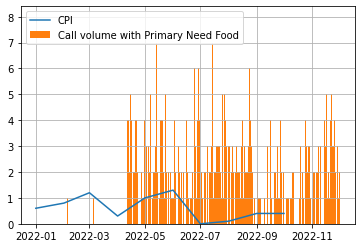

In [151]:
plt.figure(figsize=(16,6))
cpi_df.plot()
uwwi22.Interaction_CreateStamp[uwwi22.InteractionOption_SwfPrimaryNeeds=="['Food']"].hist(bins=365)
plt.legend(labels=["CPI", "Call volume with Primary Need Food"])

# comparing calls to cpi from 2020 to 2022

In [165]:
uwwi.Interaction_CreateStamp

0       2022-12-01 18:53:00.606552+00:00
1       2022-12-01 15:59:04.836496+00:00
2       2022-12-01 15:57:35.767512+00:00
3       2022-12-01 15:56:07.122672+00:00
4       2022-12-01 14:58:26.516401+00:00
                      ...               
14352   2020-01-01 12:38:38.475211+00:00
14353   2020-01-01 12:30:18.547993+00:00
14354   2020-01-01 08:30:40.471245+00:00
14355   2020-01-01 08:19:38.411104+00:00
14356   2020-01-01 07:29:12.852180+00:00
Name: Interaction_CreateStamp, Length: 32742, dtype: datetime64[ns, UTC]

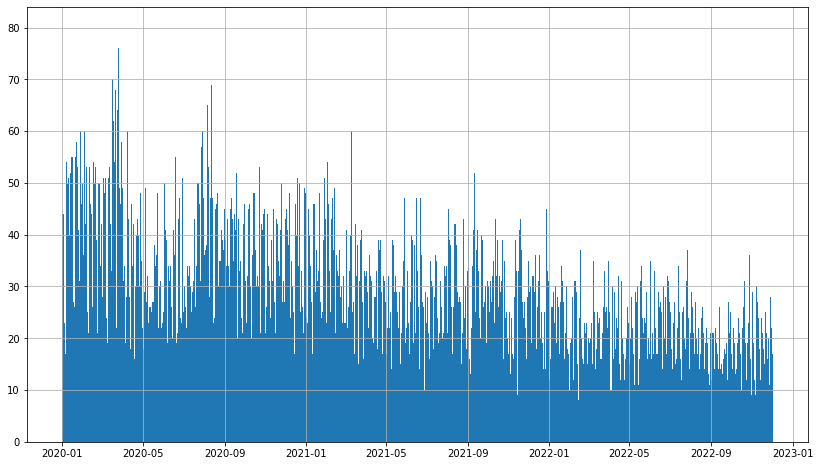

In [177]:
plt.figure(figsize=(14,8))
uwwi.Interaction_CreateStamp.hist(bins=3*365)
# call volumne from 2020 to 2022

In [172]:
uwwi.InteractionOption_SwfPrimaryNeeds.value_counts()
# most of the Primary Needs are note labeled

[]                                                 26971
['Supportive Listening']                            2030
['Other']                                            799
['Shelter']                                          732
['Food']                                             544
                                                   ...  
['Food', 'Legal Assistance']                           1
['Mental Health', 'Directory Assistance']              1
['Mental Health', 'Other Financial Assistance']        1
['Other Financial Assistance', 'Other']                1
['Supportive Listening', 'Transportation']             1
Name: InteractionOption_SwfPrimaryNeeds, Length: 67, dtype: int64

In [176]:
uwwi.Interaction_CreateStamp[uwwi.InteractionOption_SwfPrimaryNeeds=="['Food']"]
# Primary Need Food only in 2022

0      2022-12-01 18:53:00.606552+00:00
3      2022-12-01 15:56:07.122672+00:00
17     2022-11-30 18:01:19.805891+00:00
23     2022-11-30 16:11:52.223918+00:00
27     2022-11-30 15:16:07.336600+00:00
                     ...               
5113   2022-04-11 16:52:51.337793+00:00
5116   2022-04-11 16:17:39.695348+00:00
5119   2022-04-11 14:04:58.852155+00:00
5941   2022-03-04 16:15:32.275824+00:00
6560   2022-02-04 17:00:10.798356+00:00
Name: Interaction_CreateStamp, Length: 544, dtype: datetime64[ns, UTC]